In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import cv2
import os
import time
from IPython.display import clear_output
from sklearn.utils import shuffle
from sklearn import metrics as sk_metrics
from sklearn.model_selection import RandomizedSearchCV
import pickle as pkl
import scipy.ndimage as ndimage

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

from dataset import *
from descriptor import *
from SlidingWindow import *
from BagOfWords import *
from detection import *

In [3]:
# Load classifiers
classifiers = load_classifiers('waldo')

In [5]:
# Load BOVW 
bovw = load_bovw('waldo')

In [12]:
# Load image to perform object detection on
curr_wd = os.getcwd()
test_number = '004.jpg'
test_path = os.path.join(curr_wd, 'datasets/', 'JPEGImages/', test_number)

# Load ground truth annotations
provided_annot_path = os.path.join(curr_wd, 'cache_anno/', 'classification', 'provided_annots.pkl')
with open(provided_annot_path, 'rb') as f:
    provided_annots = pickle.load(f)

In [13]:
ground_truth = [0] * 4
for box in provided_annots['008.jpg']:
    coord, label = box
    if label[0] == 'waldo':
        ground_truth = coord

test_image = plt.imread(test_path)
# test_image = cv2.GaussianBlur(test_image, (3, 3), cv2.BORDER_DEFAULT) # Perform gaussian smoothing

In [15]:
# Perform detection
detections = detect(test_image, bovw, classifiers, window_scale=5, desc_type='sift')
print('Number of Bounding Boxes: ', len(detections))

Current Window Size:  155 219
Current step size:  77
Current Window Size:  310 438
Current step size:  154
Current Window Size:  620 876
Current step size:  616
Number of Bounding Boxes:  3


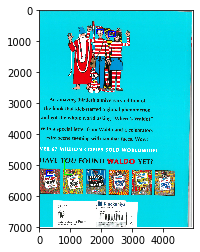

In [17]:
# Visualise detections
clone = test_image.copy()
for (x1, y1, x2, y2, score) in detections:
    cv2.rectangle(clone, (x1, y1), (x2, y2), (0, 0, 255), thickness=25)
cv2.rectangle(clone, (ground_truth[0], ground_truth[1]), (ground_truth[2], ground_truth[3]), (0, 255, 0), thickness=25)
plt.imshow(clone)